In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
bikes_data = pd.read_csv("hour.csv")

In [33]:
bikes = bikes_data.copy()

In [34]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
bikes = bikes.drop(['index','date','casual','registered'],axis=1)

In [36]:
bikes.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [37]:
bikes.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

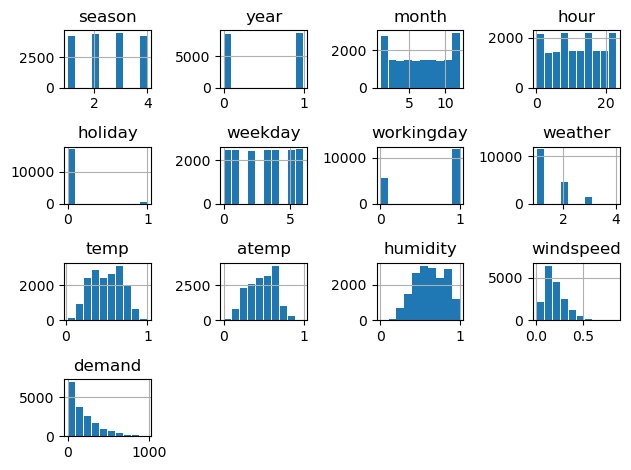

In [38]:
bikes.hist(rwidth=0.9)
plt.tight_layout()
plt.show()

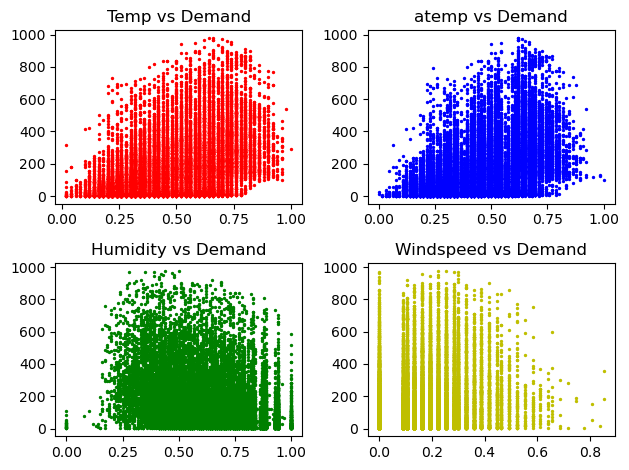

In [39]:
#Visualize continuous features vs demand
plt.subplot(2,2,1)
plt.title('Temp vs Demand')
plt.scatter(bikes['temp'],bikes['demand'],s=2,c='r')

#atemp is feeling temp
plt.subplot(2,2,2)
plt.title('atemp vs Demand')
plt.scatter(bikes['atemp'],bikes['demand'],s=2,c='b')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(bikes['humidity'],bikes['demand'],s=2,c='g')

plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(bikes['windspeed'],bikes['demand'],s=2,c='y')

plt.tight_layout()

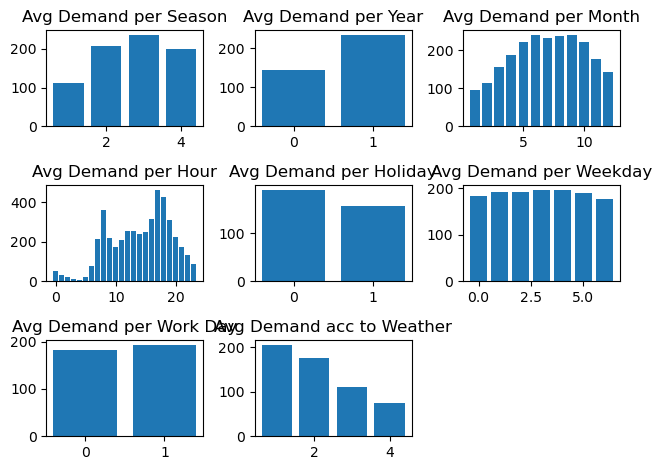

In [40]:
#Plot Categorical features vs Demand
plt.subplot(3,3,1)
plt.title('Avg Demand per Season')
cat_list = bikes['season'].unique()
cat_avg = bikes.groupby('season').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,2)
plt.title('Avg Demand per Year')
cat_list = bikes['year'].unique()
cat_avg = bikes.groupby('year').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,3)
plt.title('Avg Demand per Month')
cat_list = bikes['month'].unique()
cat_avg = bikes.groupby('month').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,4)
plt.title('Avg Demand per Hour')
cat_list = bikes['hour'].unique()
cat_avg = bikes.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,5)
plt.title('Avg Demand per Holiday')
cat_list = bikes['holiday'].unique()
cat_avg = bikes.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,6)
plt.title('Avg Demand per Weekday')
cat_list = bikes['weekday'].unique()
cat_avg = bikes.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,7)
plt.title('Avg Demand per Work Day')
cat_list = bikes['workingday'].unique()
cat_avg = bikes.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,8)
plt.title('Avg Demand acc to Weather')
cat_list = bikes['weather'].unique()
cat_avg = bikes.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.tight_layout()

<BarContainer object of 24 artists>

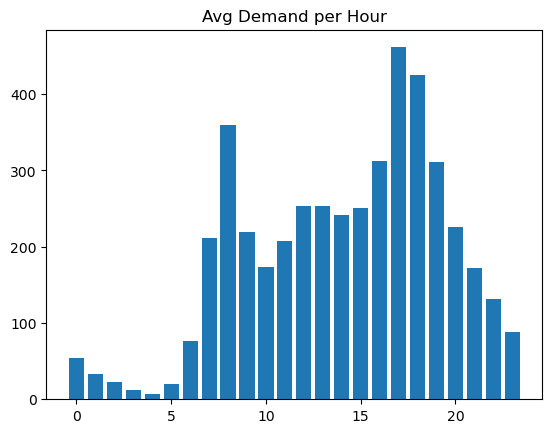

In [41]:
plt.title('Avg Demand per Hour')
cat_list = bikes['hour'].unique()
cat_avg = bikes.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg)

In [42]:
bikes['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [43]:
bikes['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [44]:
#Checking Multicollinearity
correlation = bikes[['temp','atemp','humidity','windspeed','demand']].corr()

In [45]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [46]:
bikes = bikes.drop(['atemp','windspeed','weekday','year','workingday'],axis=1)

In [47]:
bikes.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [48]:
df1 = pd.to_numeric(bikes['demand'],downcast='float')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474696, 0.47049534, 0.4962279 , 0.49404034, 0.46795914,
        0.4773202 , 0.5267575 , 0.5914572 , 0.65201545, 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.65201545, 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795914, 0.49404034, 0.4962279 , 0.47049534, 0.45474696],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x2171523f640>)

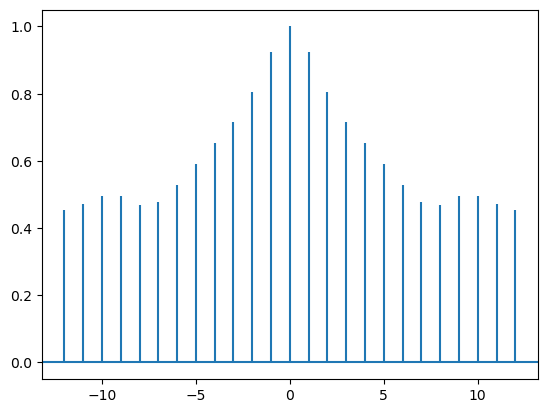

In [49]:
plt.acorr(df1,maxlags=12)

<AxesSubplot:>

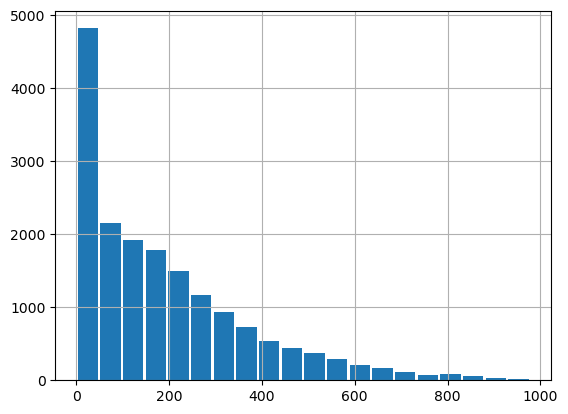

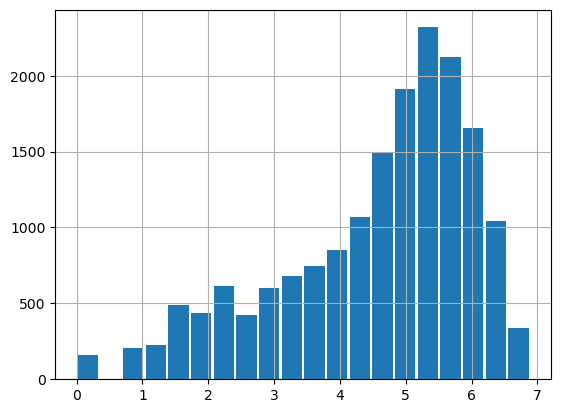

In [50]:
import numpy as np
df2 = np.log(df1)
plt.figure()
df1.hist(rwidth=0.9,bins=20)
plt.figure()
df2.hist(rwidth=0.9,bins=20)

In [51]:
bikes['demand'] = np.log(bikes['demand'])

In [52]:
bikes.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000


In [53]:
#Autocorrelation in demand column
t_1 = bikes['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_lag = pd.concat([bikes,t_1,t_2,t_3],axis=1)

In [54]:
bikes_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [55]:
bikes_lag = bikes_lag.dropna()

In [56]:
bikes_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [58]:
bikes_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [59]:
bikes_lag['season'] = bikes_lag['season'].astype('category')
bikes_lag['holiday'] = bikes_lag['holiday'].astype('category')
bikes_lag['weather'] = bikes_lag['weather'].astype('category')
bikes_lag['month'] = bikes_lag['month'].astype('category')
bikes_lag['hour'] = bikes_lag['hour'].astype('category')

bikes_lag = pd.get_dummies(bikes_lag,drop_first=True)

In [60]:
bikes_lag.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y = bikes_lag['demand']
x = bikes_lag.drop(['demand'],axis=1)

In [63]:
tr_size = 0.7*len(x)

In [64]:
tr_size = int(tr_size)

In [65]:
x_train = x.values[0:tr_size]
x_test = x.values[tr_size:len(x)]
y_train = y.values[0:tr_size]
y_test = y.values[tr_size:len(y)]

In [66]:
#Prediction using Multiple Linear Regression
from sklearn.linear_model import LinearRegression

In [67]:
std_reg = LinearRegression()
std_reg.fit(x_train,y_train)

LinearRegression()

In [69]:
r2_train = std_reg.score(x_train,y_train)
r2_test = std_reg.score(x_test,y_test)

In [70]:
y_predict = std_reg.predict(x_test)

In [73]:
from sklearn.metrics import mean_squared_error
import math

In [74]:
rmse = math.sqrt(mean_squared_error(y_test,y_predict))

In [75]:
r2_train

0.9195240591465778

In [76]:
r2_test

0.9287151360253387

In [77]:
rmse

0.38098800498170415

In [80]:
#Calculating rmsle
y_test_e = []
y_predict_e = []
for i in range(0,len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))

In [81]:
#Do the sum of logs and squares
log_sq_sum = 0.0
for i in range(0,len(y_test_e)):
    log_a = math.log(y_test_e[i] + 1)
    log_p = math.log(y_predict_e[i] + 1)
    log_diff = (log_a-log_p)**2
    log_sq_sum = log_sq_sum + log_diff
    
rmsle = math.sqrt(log_sq_sum/len(y_test))

In [82]:
print(rmsle)

0.3560941706980206
